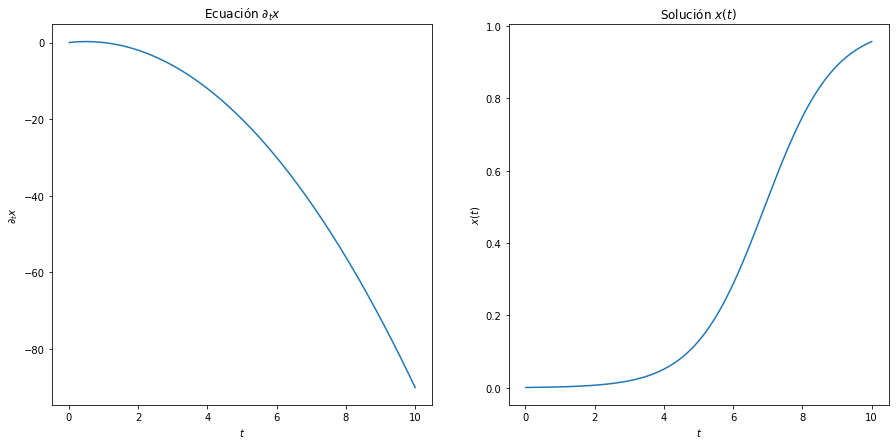

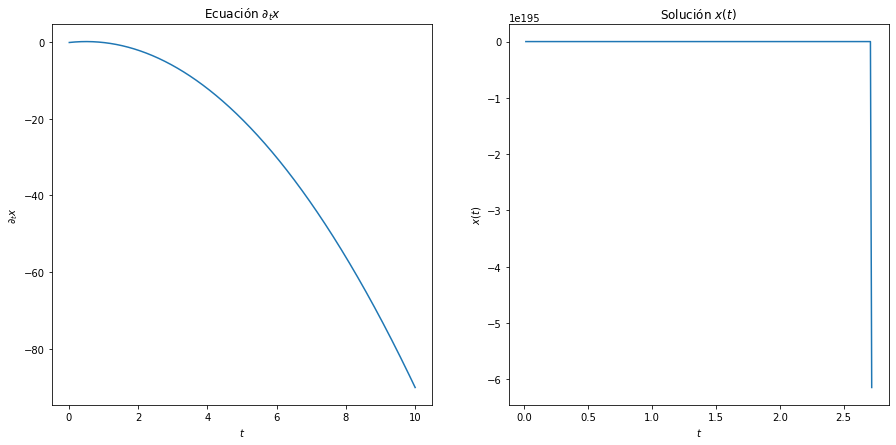

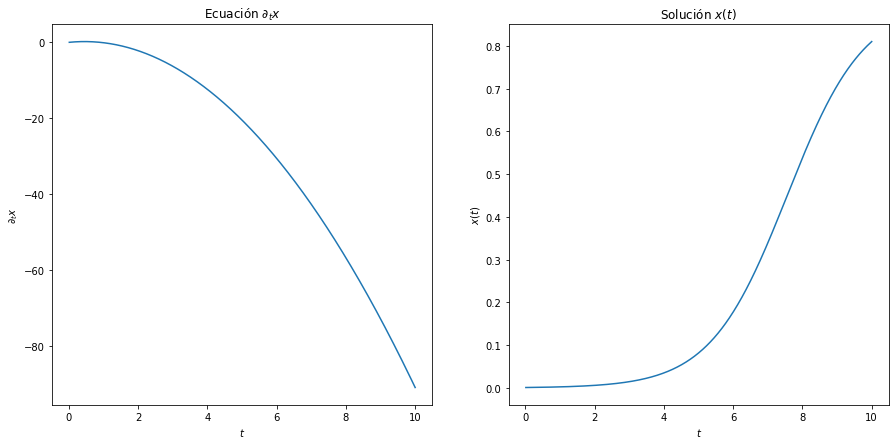

In [1]:
import numpy as np
import matplotlib.pyplot as plt

'''
Función que estima los valores numéricos de la 
solución de una EDO ordinaria de primer orden
mediante el método de Runge-Kutta de orden 2
Input:
    f: Ecuación diferencial ordinaria
    x: Valor de la condición inicial  x(t0)
    t: Valor de t en la condición inicial 
    h: Salto para el cálculo de la condición inicial
    N: Número de interaciones
'''
def RungeKutta2(F, x0, t0, h, N):
    v_t0=[]
    v_x0=[]
    for i in range(N):
        F1=h*float(F(x0))
        t0=t0+h
        F2=h*float(F(x0 + F1))
        x0=x0+(1/2)*(F1+F2)
        v_t0.append(float(t0))
        v_x0.append(float(x0))
    return v_t0,v_x0 
'''
Output: Vectores x0 y t0 con los valores estimado de la
        EDO ordinaria 
'''

#Parámetros del sistema
r = 1
K = 1
H = 0.1

def logistica(x0):
    return r*x0*(1 - (x0/K))

def pescaConstante(x0):
    return r*x0*(1 - (x0/K)) - H

def pescaProporcional(x0):
    return r*x0*(1 - (x0/K)) - H*x0

#Condiciones iniciales
t0 = 0.001
x0 = logistica(t0)

#Calcular el valor de la solucion para cada modelo
t1, x1 = RungeKutta2(logistica, x0, t0, 0.01, 1000)
t2, x2 = RungeKutta2(pescaConstante, x0, t0, 0.01, 1000)
t3, x3 = RungeKutta2(pescaProporcional, x0, t0, 0.01, 1000)

#Calcular el valor de la derivada para cada modelo
ec1 = []
ec2 = []
ec3 = []
for i in t1:
    ec1.append(logistica(i))
    ec2.append(pescaConstante(i))
    ec3.append(pescaProporcional(i))

#Ecuacion Logistica
f1 = plt.figure(figsize=(15,7)); plt.ioff()
lienzo11 = f1.add_subplot(1,2,1)
lienzo12 = f1.add_subplot(1,2,2)
lienzo11.set_xlabel(r'$t$')
lienzo11.set_ylabel(r'$\partial_t x$')
lienzo11.set_title(r'Ecuación $\partial_t x$')
lienzo11.plot(t1,ec1)
lienzo12.set_xlabel(r'$t$')
lienzo12.set_ylabel(r'$x(t)$')
lienzo12.set_title(r'Solución $x(t)$')
lienzo12.plot(t1,x1)
plt.ion(); plt.draw()

#Ecuacion Pesca Constante
f2 = plt.figure(figsize=(15,7)); plt.ioff()
lienzo21 = f2.add_subplot(1,2,1)
lienzo22 = f2.add_subplot(1,2,2)
lienzo21.set_xlabel(r'$t$')
lienzo21.set_ylabel(r'$\partial_t x$')
lienzo21.set_title(r'Ecuación $\partial_t x$')
lienzo21.plot(t2,ec2)
lienzo22.set_xlabel(r'$t$')
lienzo22.set_ylabel(r'$x(t)$')
lienzo22.set_title(r'Solución $x(t)$')
lienzo22.plot(t2,x2)
plt.ion(); plt.draw()

#Ecuacion Pesca Proporcional
f3 = plt.figure(figsize=(15,7)); plt.ioff()
lienzo31 = f3.add_subplot(1,2,1)
lienzo32 = f3.add_subplot(1,2,2)
lienzo31.set_xlabel(r'$t$')
lienzo31.set_ylabel(r'$\partial_t x$')
lienzo31.set_title(r'Ecuación $\partial_t x$')
lienzo31.plot(t3,ec3)
lienzo32.set_xlabel(r'$t$')
lienzo32.set_ylabel(r'$x(t)$')
lienzo32.set_title(r'Solución $x(t)$')
lienzo32.plot(t3,x3)
plt.ion(); plt.draw()